In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_excel("D:/FCDS/Data Sets/Self Study/7 Data analysis/startup-expansion.xlsx")
df

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [4]:
df.describe().round(2)

,Store ID,Marketing Spend,Revenue
count,150.00,150.00,150.00
mean,75.50,2893.15,39301.43
std,43.45,367.86,15465.75
min,1.00,1811.00,15562.00
25%,38.25,2662.25,21113.50
50%,75.50,2898.00,42993.00
75%,112.75,3111.50,51145.50
max,150.00,3984.00,68828.00


In [5]:
df['City'].value_counts()

Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: City, Length: 149, dtype: int64

In [6]:
df['City'].nunique() 

149

In [7]:
df['City'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [8]:
df['State'].value_counts() 

California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: State, dtype: int64

In [9]:
df['State'].nunique() 

35

In [10]:
df['State'].unique() 

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [11]:
df['Sales Region'].value_counts() 

Region 2    86
Region 1    64
Name: Sales Region, dtype: int64

In [12]:
df.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [13]:
df.duplicated().sum()

0

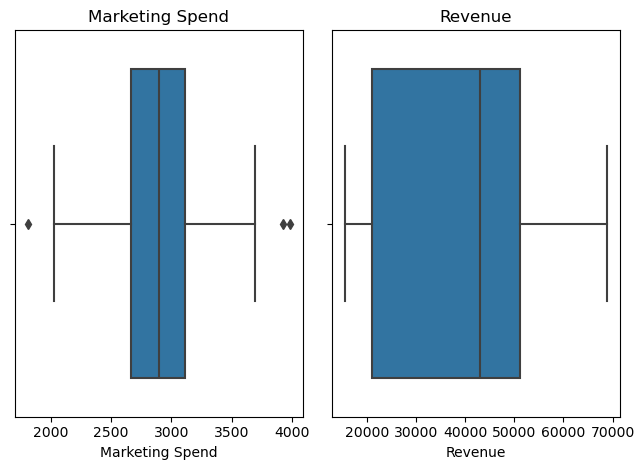

In [14]:
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Marketing Spend'])
plt.title('Marketing Spend')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Revenue'])
plt.title('Revenue')
plt.tight_layout()

In [15]:
def replace_outliers(df, column_name):
    while True:
        data = df[column_name]
        
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = (data < lower_bound) | (data > upper_bound)
        if not outliers.any():
            break
            
        mean = data[(data >= lower_bound) & (data <= upper_bound)].mean()
        df.loc[(data < lower_bound) | (data > upper_bound), column_name] =mean

In [16]:
replace_outliers(df ,'Marketing Spend')

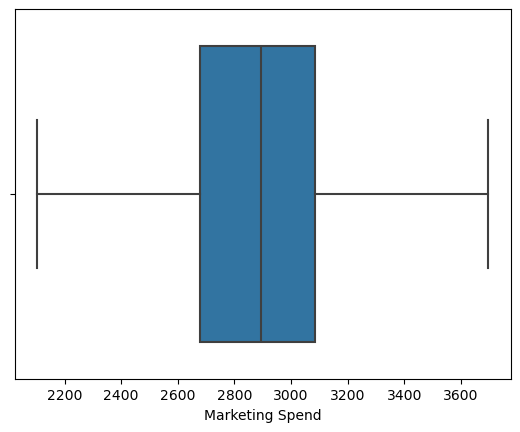

In [17]:
sns.boxplot(x=df['Marketing Spend'])
plt.show()

<Axes: >

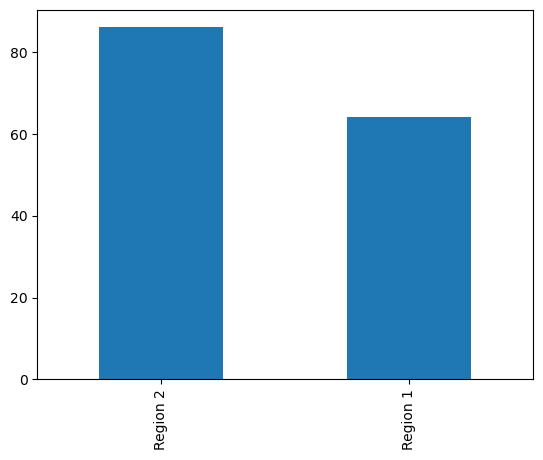

In [18]:
df['Sales Region'].value_counts().plot.bar()

In [19]:
df.groupby('New Expansion')

In [20]:
df[df['New Expansion']=='Old'].groupby('City').max()['Revenue'].nlargest(10)

City
Little Rock       68828
Grand Rapids      65475
Rochester         64906
Oxnard            64302
Fontana           63027
Providence        62337
Birmingham        60338
Overland Park     59887
San Bernardino    59870
Worcester         59840
Name: Revenue, dtype: int64

In [21]:
df[df['New Expansion']=='New'].groupby('City').max()['Revenue'].nlargest(10)

City
Brownsville         63148
Chattanooga         55357
Rancho Cucamonga    52366
Glendale            49376
Tempe               48954
Joliet              48315
Rockford            43377
Thousand Oaks       40141
Paterson            34603
College Station     22457
Name: Revenue, dtype: int64

In [22]:
df['profit']=df['Revenue']-df['Marketing Spend']

In [23]:
df['present profit']=((df['profit']/df['Marketing Spend'])*100).round(2)
df

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,profit,present profit
0,1,Peoria,Arizona,Region 2,Old,2601.0,48610,46009.0,1768.90
1,2,Midland,Texas,Region 2,Old,2727.0,45689,42962.0,1575.43
2,3,Spokane,Washington,Region 2,Old,2768.0,49554,46786.0,1690.25
3,4,Denton,Texas,Region 2,Old,2759.0,38284,35525.0,1287.60
4,5,Overland Park,Kansas,Region 2,Old,2869.0,59887,57018.0,1987.38
...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251.0,34603,32352.0,1437.23
146,147,Brownsville,Texas,Region 2,New,3675.0,63148,59473.0,1618.31
147,148,Rockford,Illinois,Region 1,New,2648.0,43377,40729.0,1538.10
148,149,College Station,Texas,Region 2,New,2994.0,22457,19463.0,650.07


In [24]:
df[df['New Expansion']=='Old'].groupby('City').max()['present profit'].nlargest(10)

City
Little Rock         2720.82
Oxnard              2674.03
Grand Rapids        2231.73
Port St. Lucie      2205.37
Worcester           2137.01
Rochester           2075.13
Visalia             2068.82
Akron               2054.15
Huntington Beach    2042.66
Newport News        1989.38
Name: present profit, dtype: float64

In [25]:
df[df['New Expansion']=='New'].groupby('City').max()['present profit'].nlargest(10)

City
Glendale            1989.55
Rancho Cucamonga    1678.13
Brownsville         1618.31
Tempe               1581.69
Thousand Oaks       1551.21
Rockford            1538.10
Chattanooga         1443.27
Paterson            1437.23
Joliet              1373.47
College Station      650.07
Name: present profit, dtype: float64

In [70]:
df.to_csv('D:/FCDS/Internships/Brainwave/new_data.csv')